In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_370_hflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_45_zoom.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_407_vflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_367_vflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_3_vflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_origonly_535_orig.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_245_hflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_319_zoom.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_310_zoom.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_80_hflip.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_372_orig.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_294_orig.jpg
/kaggle/input/bangladeshi-local-flower/archive/Kamini/img_aug_315_zoom.jpg
/kaggle/input/bang

In [2]:
import os
print(os.listdir('/kaggle/input/bangladeshi-local-flower/archive'))


['Kamini', 'Rainlily', 'Sondhamaloti', 'Kolaboti', 'Madhobilota', 'Gondhoraj', 'Kathgulap', 'Noyontara', 'Zinnia', 'Belly']


In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configure matplotlib
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# Model selection and evaluation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Preprocessing (fixed import)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Deep learning libraries
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical

# TensorFlow
import tensorflow as tf

# For reproducibility
import random as rn

# Image processing and file handling
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


2025-05-31 12:53:12.679736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748695992.888623      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748695992.951198      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_cannalily='/kaggle/input/bangladeshi-local-flower/archive/Kolaboti'
FLOWER_chinese_box='/kaggle/input/bangladeshi-local-flower/archive/Kamini'
FLOWER_gardenia='/kaggle/input/bangladeshi-local-flower/archive/Gondhoraj'
FLOWER_rangan_creeper='/kaggle/input/bangladeshi-local-flower/archive/Madhobilota'
FLOWER_arabian_jasmine='/kaggle/input/bangladeshi-local-flower/archive/Belly'
FLOWER_Catharanthus='/kaggle/input/bangladeshi-local-flower/archive/Noyontara'
FLOWER_four_oclock='/kaggle/input/bangladeshi-local-flower/archive/Sondhamaloti'
FLOWER_rainlily='/kaggle/input/bangladeshi-local-flower/archive/Rainlily'
FLOWER_zinnia='/kaggle/input/bangladeshi-local-flower/archive/Zinnia'
FLOWER_Kathgulap='/kaggle/input/bangladeshi-local-flower/archive/Kathgulap'


In [5]:
def assign_label(img,flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))


In [7]:
make_train_data('Rainlily',FLOWER_rainlily)
print(len(X))


100%|██████████| 2000/2000 [00:15<00:00, 125.79it/s]

2000


In [8]:
make_train_data('Kolaboti',FLOWER_cannalily)
print(len(X))

100%|██████████| 2000/2000 [00:12<00:00, 160.23it/s]

4000


In [9]:
make_train_data('Chinese-box',FLOWER_chinese_box)
print(len(X))

100%|██████████| 2000/2000 [00:15<00:00, 125.50it/s]

6000


In [10]:
make_train_data('Gardenia',FLOWER_gardenia)
print(len(X))

100%|██████████| 2000/2000 [00:11<00:00, 170.52it/s]

8000


In [11]:
make_train_data('Rangan_Creeper',FLOWER_rangan_creeper)
print(len(X))

100%|██████████| 2000/2000 [00:15<00:00, 126.93it/s]

10000


In [12]:
make_train_data('arabian-jasmine',FLOWER_arabian_jasmine)
print(len(X))

100%|██████████| 2000/2000 [00:15<00:00, 133.21it/s]

12000


In [13]:
make_train_data('catharanthus',FLOWER_Catharanthus)
print(len(X))

100%|██████████| 2000/2000 [00:14<00:00, 140.11it/s]

14000


In [14]:
make_train_data('four-oclock',FLOWER_four_oclock)
print(len(X))

100%|██████████| 2000/2000 [00:11<00:00, 177.89it/s]

16000


In [15]:
make_train_data('zinnia',FLOWER_zinnia)
print(len(X))

100%|██████████| 2000/2000 [00:15<00:00, 131.54it/s]

18000


In [16]:
make_train_data('Kathgulap',FLOWER_Kathgulap)
print(len(X))

100%|██████████| 2000/2000 [00:15<00:00, 128.16it/s]

20000


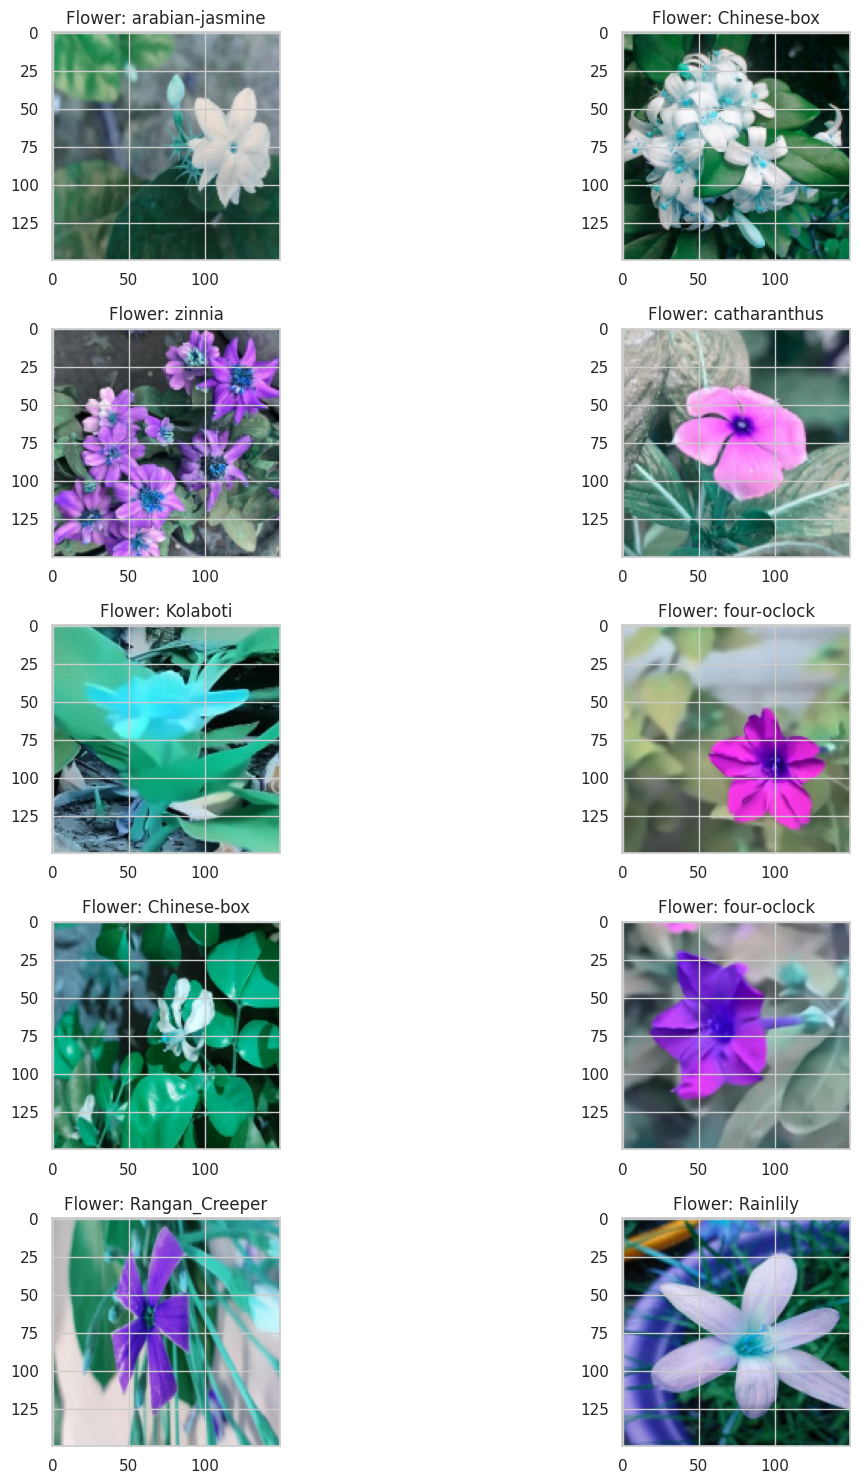

In [17]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [18]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
import numpy as np
import random as rn
import tensorflow as tf

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2

weight_decay = 1e-4  # You can tune this

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu',
                 kernel_regularizer=l2(weight_decay), input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu',
                 kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu',
                 kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu',
                 kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout added here
model.add(Dense(10, activation="softmax"))


I0000 00:00:1748696160.506803      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748696160.507484      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [22]:
batch_size=32
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


In [23]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
# No datagen.fit() needed here - just use flow() directly

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,146,314 (15.82 MB)

 Trainable params: 4,146,314 (15.82 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Initialize generators
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # No augmentation for validation

# 2. Verify data shapes
print("Train shapes:", x_train.shape, y_train.shape)
print("Test shapes:", x_test.shape, y_test.shape)

# 3. Calculate steps
batch_size = 32
train_steps = max(1, len(x_train) // batch_size)
val_steps = max(1, len(x_test) // batch_size)

# 4. Train with proper generators
History = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=train_steps,
    validation_data=val_datagen.flow(x_test, y_test, batch_size=batch_size),
    validation_steps=val_steps,
    epochs=10,
    verbose=1
)

Train shapes: (15000, 150, 150, 3) (15000, 10)
Test shapes: (5000, 150, 150, 3) (5000, 10)
Epoch 1/10


I0000 00:00:1748696171.265063      66 service.cc:148] XLA service 0x7a01140035b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748696171.266001      66 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748696171.266026      66 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748696171.706370      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/468 ━━━━━━━━━━━━━━━━━━━━ 1:03:21 8s/step - accuracy: 0.1250 - loss: 2.3925

I0000 00:00:1748696176.448784      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 160ms/step - accuracy: 0.3821 - loss: 1.7320 - val_accuracy: 0.7250 - val_loss: 0.8557
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.9169 - val_accuracy: 0.7284 - val_loss: 0.8407
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.6830 - loss: 0.9599 - val_accuracy: 0.8265 - val_loss: 0.6169
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8125 - loss: 0.4605 - val_accuracy: 0.8221 - val_loss: 0.6266
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.7724 - loss: 0.7659 - val_accuracy: 0.8570 - val_loss: 0.5410
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.6660 - val_accuracy: 0.8582 - val_loss: 0.5436
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.8081 - loss: 0.6865 - val_accuracy: 0.8782 - val_loss: 0.4773
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.5529 - val_accuracy: 0

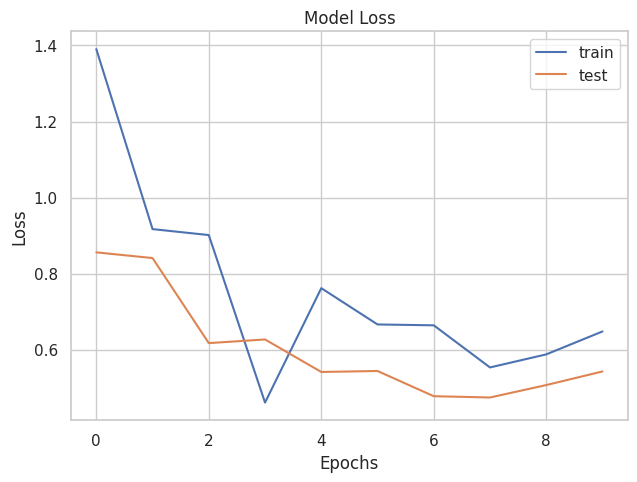

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

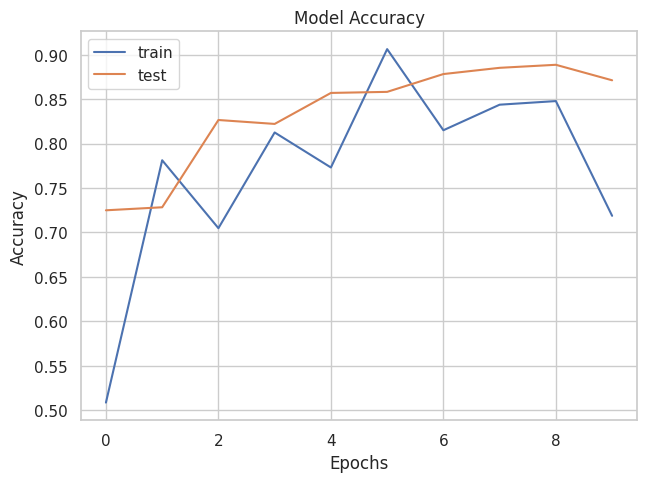

In [27]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
# Safe batch prediction
pred = []
batch_size = 32  # Reduce if needed
for i in range(0, len(x_test), batch_size):
    pred.append(model.predict(x_test[i:i+batch_size], verbose=0))
pred = np.concatenate(pred)
pred_digits = np.argmax(pred, axis=1)

In [29]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

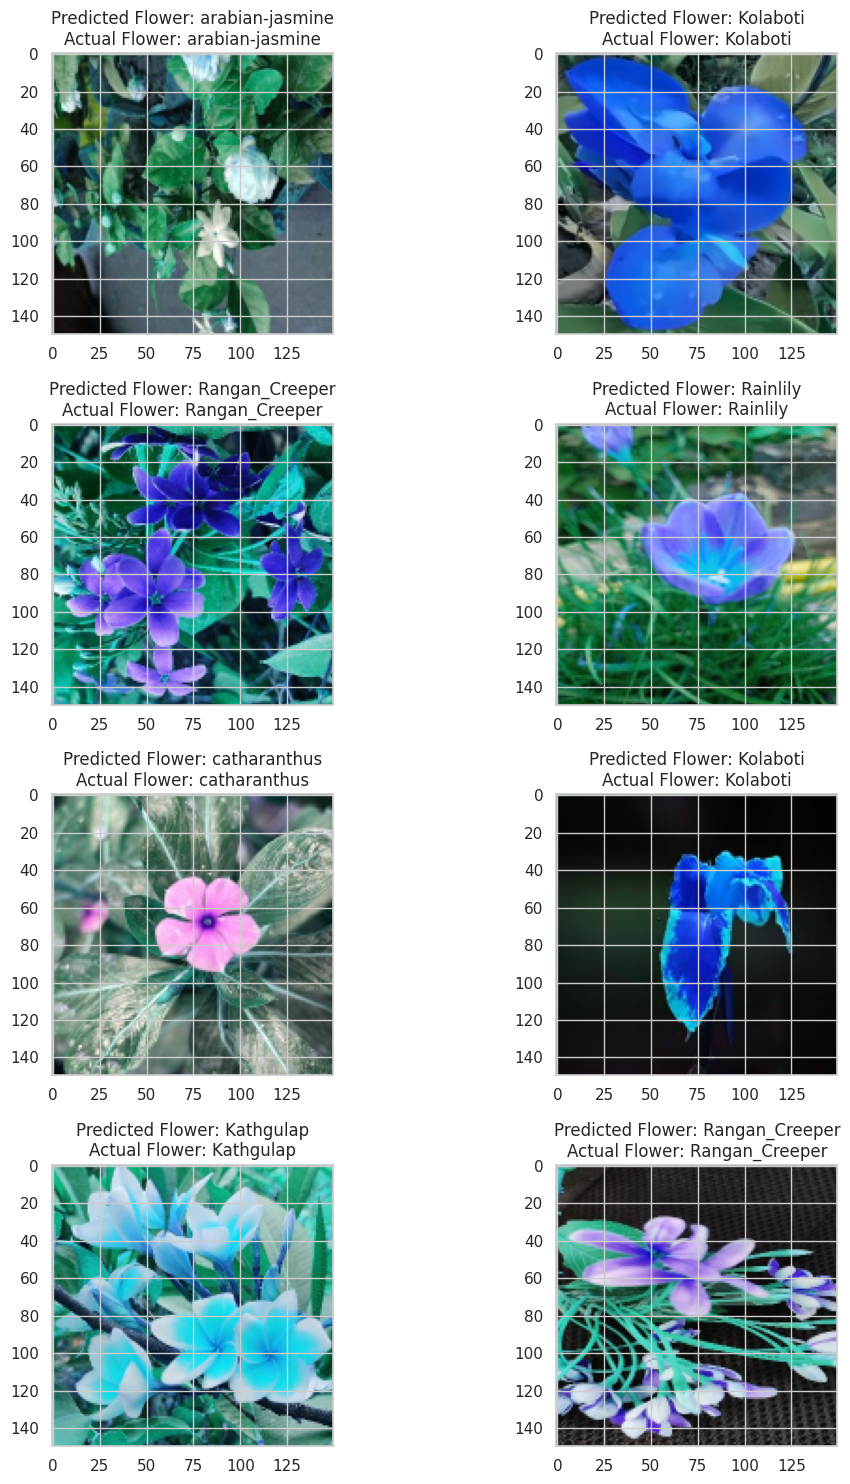

In [30]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        
        predicted_label = le.inverse_transform([pred_digits[prop_class[count]]])[0]
        actual_label = le.inverse_transform([np.argmax(y_test[prop_class[count]])])[0]
        
        ax[i, j].set_title("Predicted Flower: " + predicted_label + "\nActual Flower: " + actual_label)
        plt.tight_layout()
        count += 1


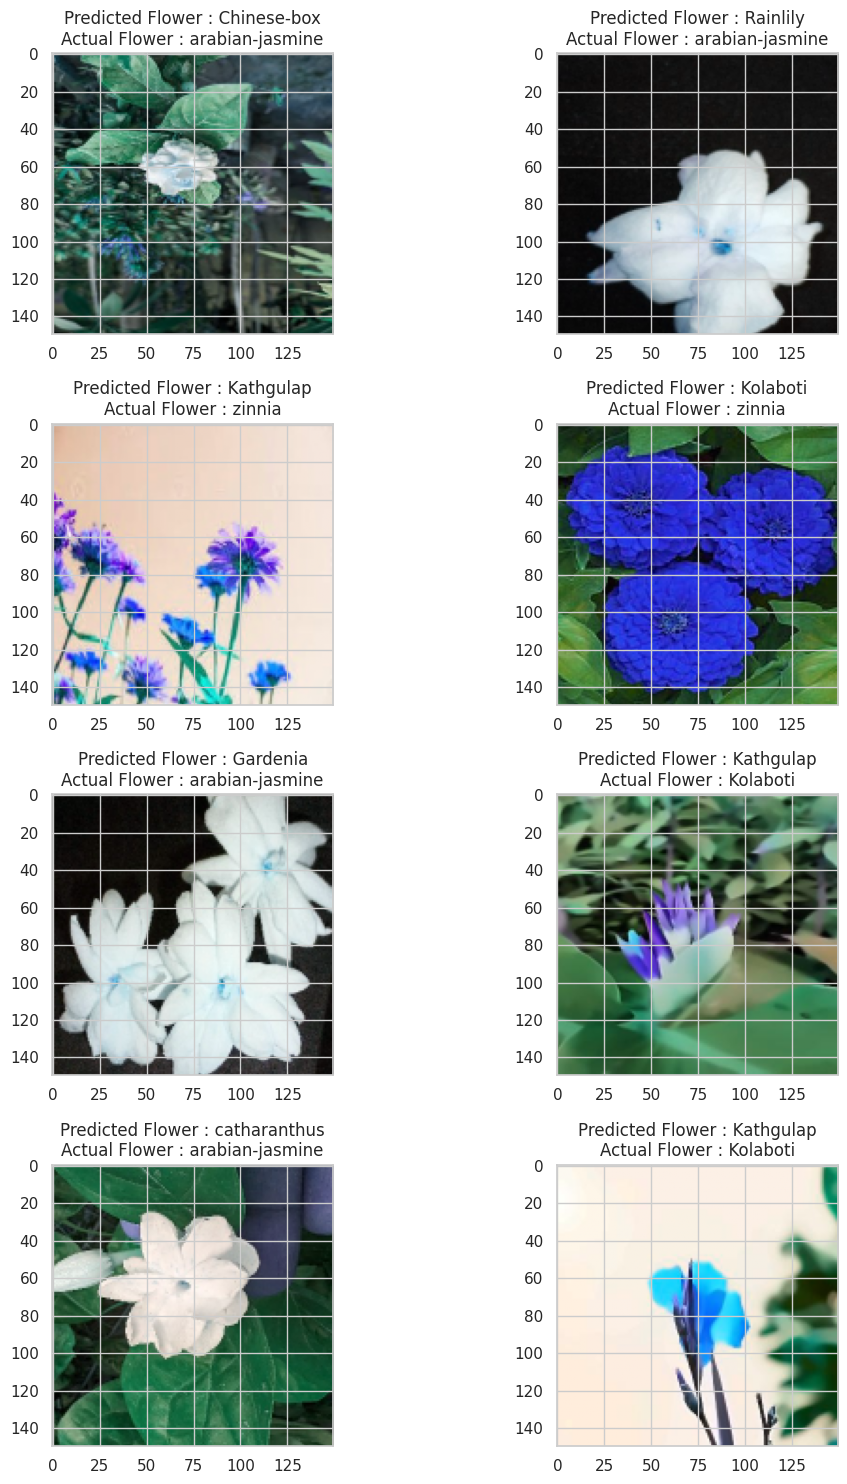

In [31]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[mis_class[count]])

        # FIX: Ensure inverse_transform gets a 1D array
        pred_idx = pred_digits[mis_class[count]]
        actual_idx = np.argmax(y_test[mis_class[count]])

        pred_label = le.inverse_transform([pred_idx])[0]
        actual_label = le.inverse_transform([actual_idx])[0]

        ax[i, j].set_title("Predicted Flower : " + pred_label + "\nActual Flower : " + actual_label)
        plt.tight_layout()
        count += 1


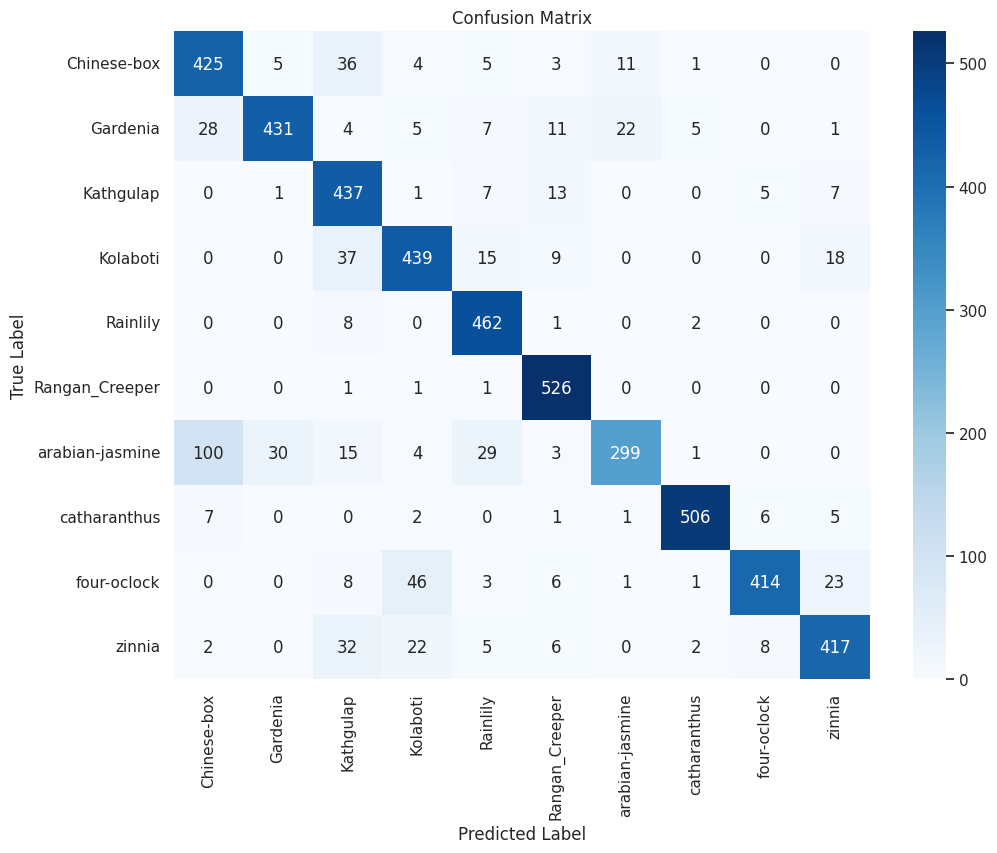

Classification Report:

                 precision    recall  f1-score   support

    Chinese-box       0.76      0.87      0.81       490
       Gardenia       0.92      0.84      0.88       514
      Kathgulap       0.76      0.93      0.83       471
       Kolaboti       0.84      0.85      0.84       518
       Rainlily       0.87      0.98      0.92       473
 Rangan_Creeper       0.91      0.99      0.95       529
arabian-jasmine       0.90      0.62      0.73       481
   catharanthus       0.98      0.96      0.97       528
    four-oclock       0.96      0.82      0.89       502
         zinnia       0.89      0.84      0.86       494

       accuracy                           0.87      5000
      macro avg       0.88      0.87      0.87      5000
   weighted avg       0.88      0.87      0.87      5000

Weighted F1 Score: 0.8696


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert y_test from one-hot to class indices
y_true = np.argmax(y_test, axis=1)

# Step 2: Ensure predictions are in class index format
y_pred = pred_digits  # or np.argmax(model.predict(x_test), axis=1)

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Classification Report (includes precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Step 6: Optionally show overall F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")



In [33]:
# Save the model to an HDF5 file
model.save('my_model.h5')
